<a href="https://colab.research.google.com/github/Mrugesh96/End2end-NLP-project/blob/main/Text_Emotion_Detection_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install transformers -q

In [3]:
from transformers import pipeline


In [4]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")


In [5]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

Downloading:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [6]:
emotion_labels = emotion("I'm sorry that the order got delayed")


In [7]:
emotion_labels

[{'label': 'remorse', 'score': 0.7496771812438965}]

In [8]:
emotion_labels[0]['label']

'remorse'

In [9]:
import pandas as pd

In [10]:
large_text = pd.read_csv('https://github.com/abishekarun/Text-Emotion-Classification/blob/master/text_emotion.csv?raw=true')

In [11]:
large_text.shape

(40000, 4)

In [12]:
large_text.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [13]:
large_text = large_text[:100]

In [14]:
large_text.shape

(100, 4)

In [15]:
large_text['content'][1:10].apply(emotion)

1    [{'label': 'neutral', 'score': 0.9288991093635...
2      [{'label': 'joy', 'score': 0.7030631899833679}]
3      [{'label': 'joy', 'score': 0.5057836771011353}]
4    [{'label': 'desire', 'score': 0.80342656373977...
5    [{'label': 'neutral', 'score': 0.9537403583526...
6    [{'label': 'neutral', 'score': 0.3837682008743...
7    [{'label': 'approval', 'score': 0.636144876480...
8     [{'label': 'love', 'score': 0.9831995964050293}]
9    [{'label': 'remorse', 'score': 0.4822780787944...
Name: content, dtype: object

In [16]:
def get_emotion_label(text):
  return(emotion(text)[0]['label'])

In [36]:
get_emotion_label("")

'neutral'

In [18]:
large_text['content'][1:10].apply(get_emotion_label)

1     neutral
2         joy
3         joy
4      desire
5     neutral
6     neutral
7    approval
8        love
9     remorse
Name: content, dtype: object

In [19]:
large_text['emotion'] = large_text['content'].apply(get_emotion_label)

In [20]:
large_text

,tweet_id,sentiment,author,content,emotion
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,neutral
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,neutral
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,joy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,joy
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,desire
...,...,...,...,...,...
95,1956989514,sadness,yellowduckx,@sweeetnspicy hiii im on my ipod...i cant fall...,neutral
96,1956989526,sadness,KaKuBby,dont wanna work 11-830 tomorrow but i get paid,disapproval
97,1956989560,sadness,benchidol,feels sad coz i wasnt able to play with the gu...,sadness
98,1956989561,neutral,outrAjusCharmer,PrinceCharming,neutral


In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

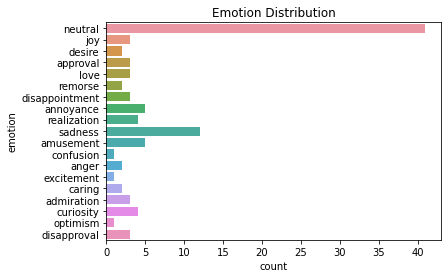

In [22]:
sns.countplot(data = large_text, y = 'emotion').set_title("Emotion Distribution")